<a href="https://colab.research.google.com/github/KrittikaDas/Python-Project/blob/main/HeartDisease1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # exploring the csv
import numpy as np  # linear algebra
import matplotlib.pyplot as plt  # data visualisation
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()  # uploading the file

Saving heart.csv to heart (1).csv


In [3]:
df = pd.read_csv('heart.csv')  # loading the dataset

In [4]:
# Exploring the data :

# display the first few rows
df.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [5]:
# dimensions of a DataFrame(no. of rows and cols)
df.shape

(1025, 14)

In [6]:
#  total number of elements in a DataFrame
df.size  # (rows * columns)

14350

In [7]:
# get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# get descriptive statistics
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323902   0.620660    0.0    2.0    2.0    3.0    3.0
target    1025.0    0.513171   0.500070    0.0    0.0    1.0    1.0    1.0

In [9]:
# check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.isnull().any()  # in boolean

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [11]:
df.target.value_counts()  # get the count of each unique value in the 'target' column
# to see how many patients have heart disease (represented by 1) and how many do not (represented by 0)

target
1    526
0    499
Name: count, dtype: int64

In [12]:
# checking for duplicate values
df[df.duplicated()==True]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2   0     2       1  
43        2   0     3       0  
55        0   0     3       0  
61        1   1     2       1  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[723 rows x 14 columns]

In [13]:
# Data Preprocessing

# dropping duplicates
df.drop_duplicates(inplace=True)

In [14]:
df[df.duplicated()==True]  # checking again for duplicate values(which should return us empty df as they are already dropped)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

In [15]:

# fill missing values with mean (if any)
df.fillna(df.mean(), inplace=True)

In [16]:
# one-hot encoding
data = pd.get_dummies(df, drop_first=True)  # if there are categorical variables, encoding them using one-hot encoding or label encoding

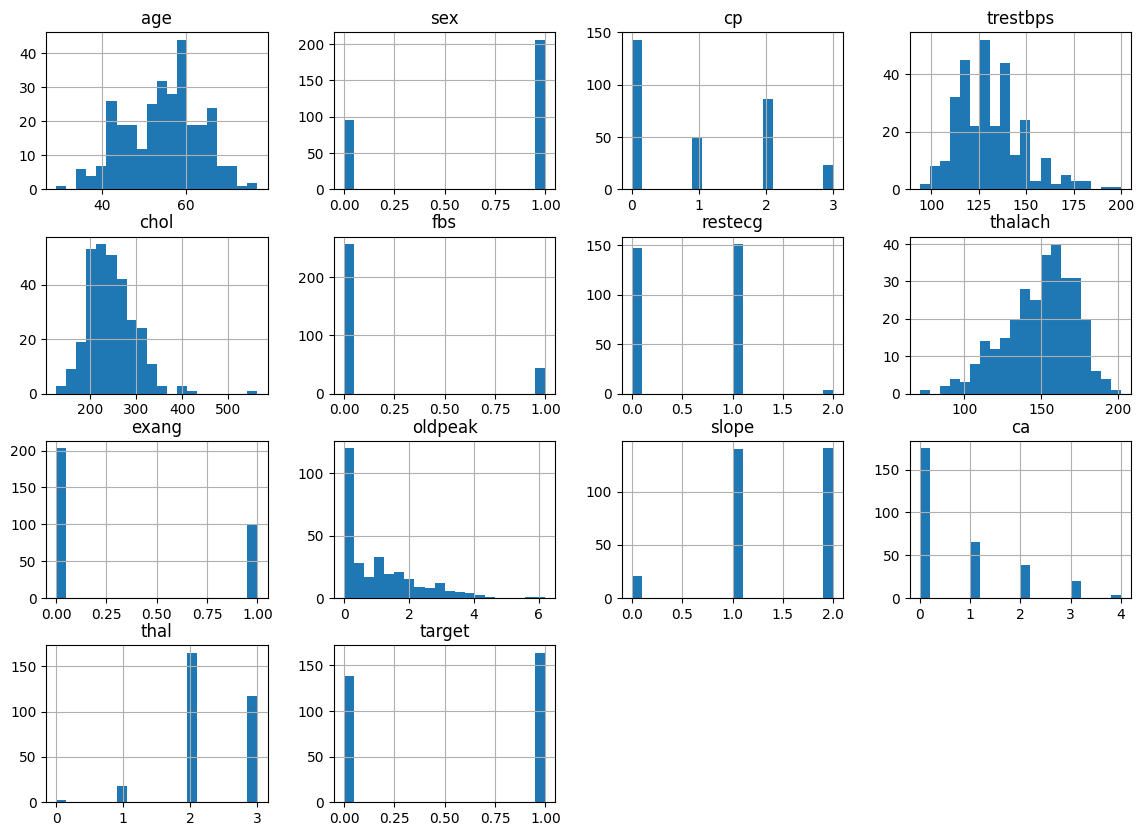

In [17]:
# Data Visualisation :

# Distribution of features :-
# Histogram for numerical features
df.hist(bins=20, figsize=(14,10))
plt.show()

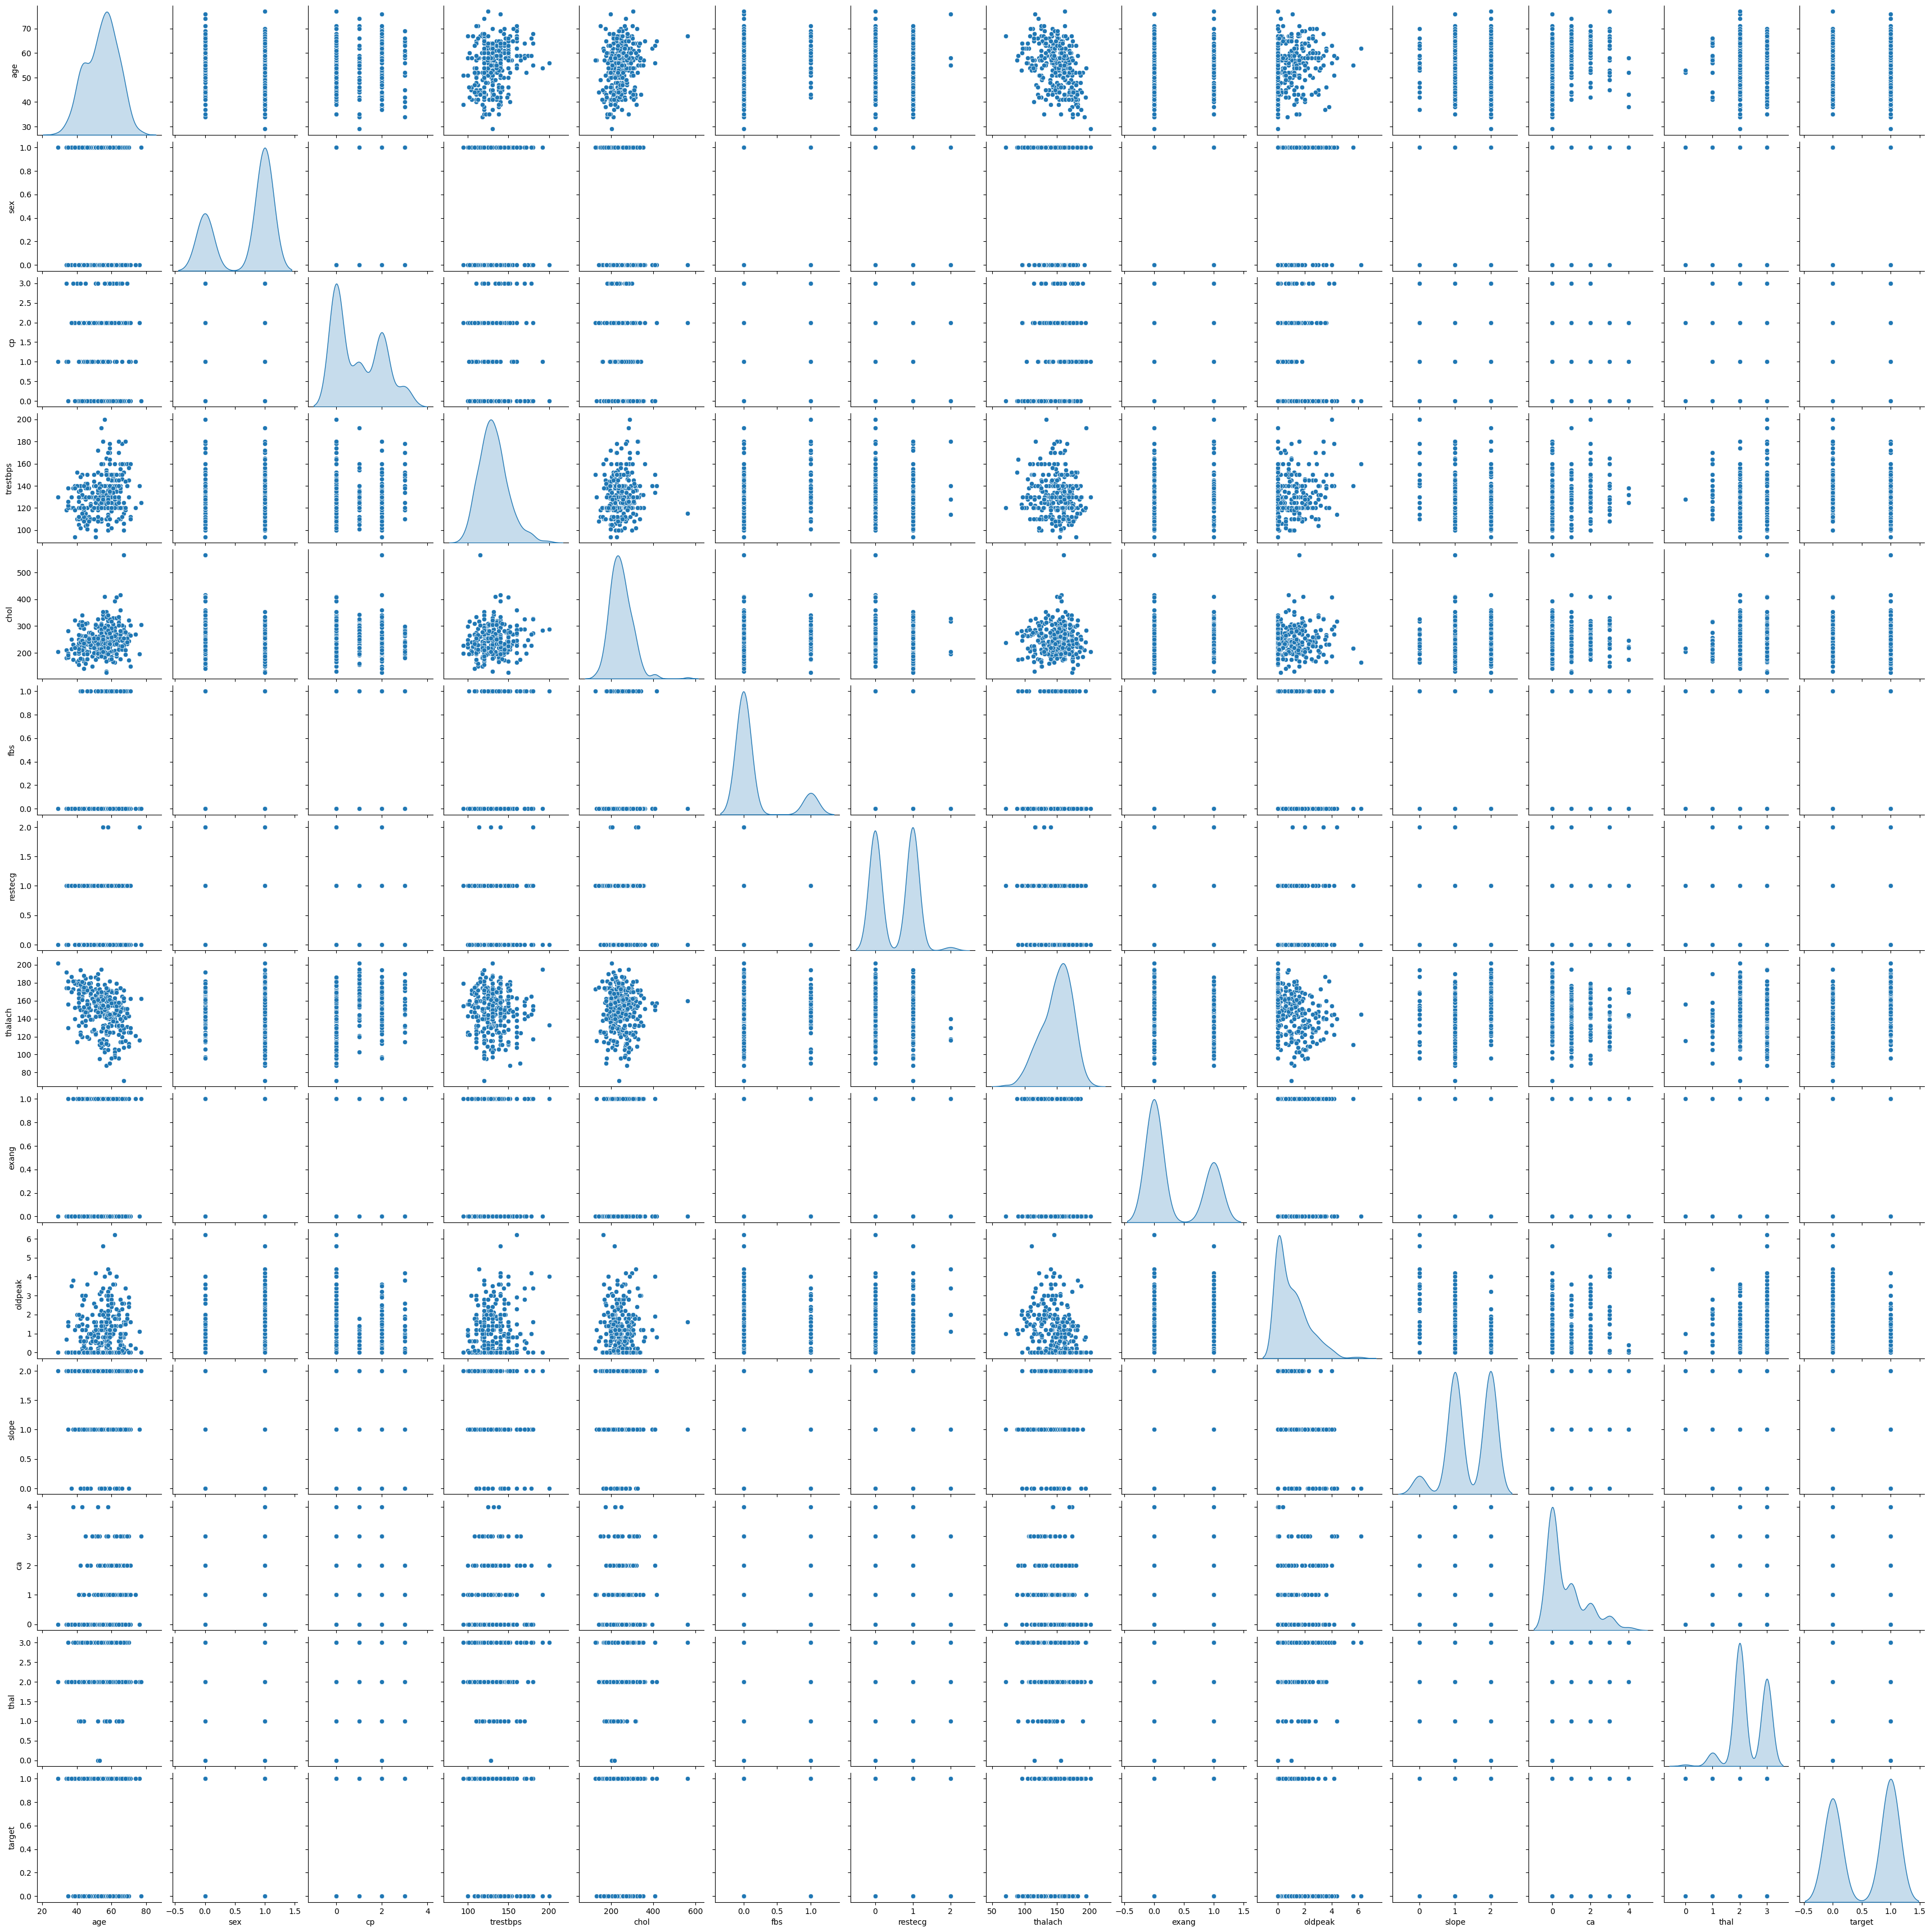

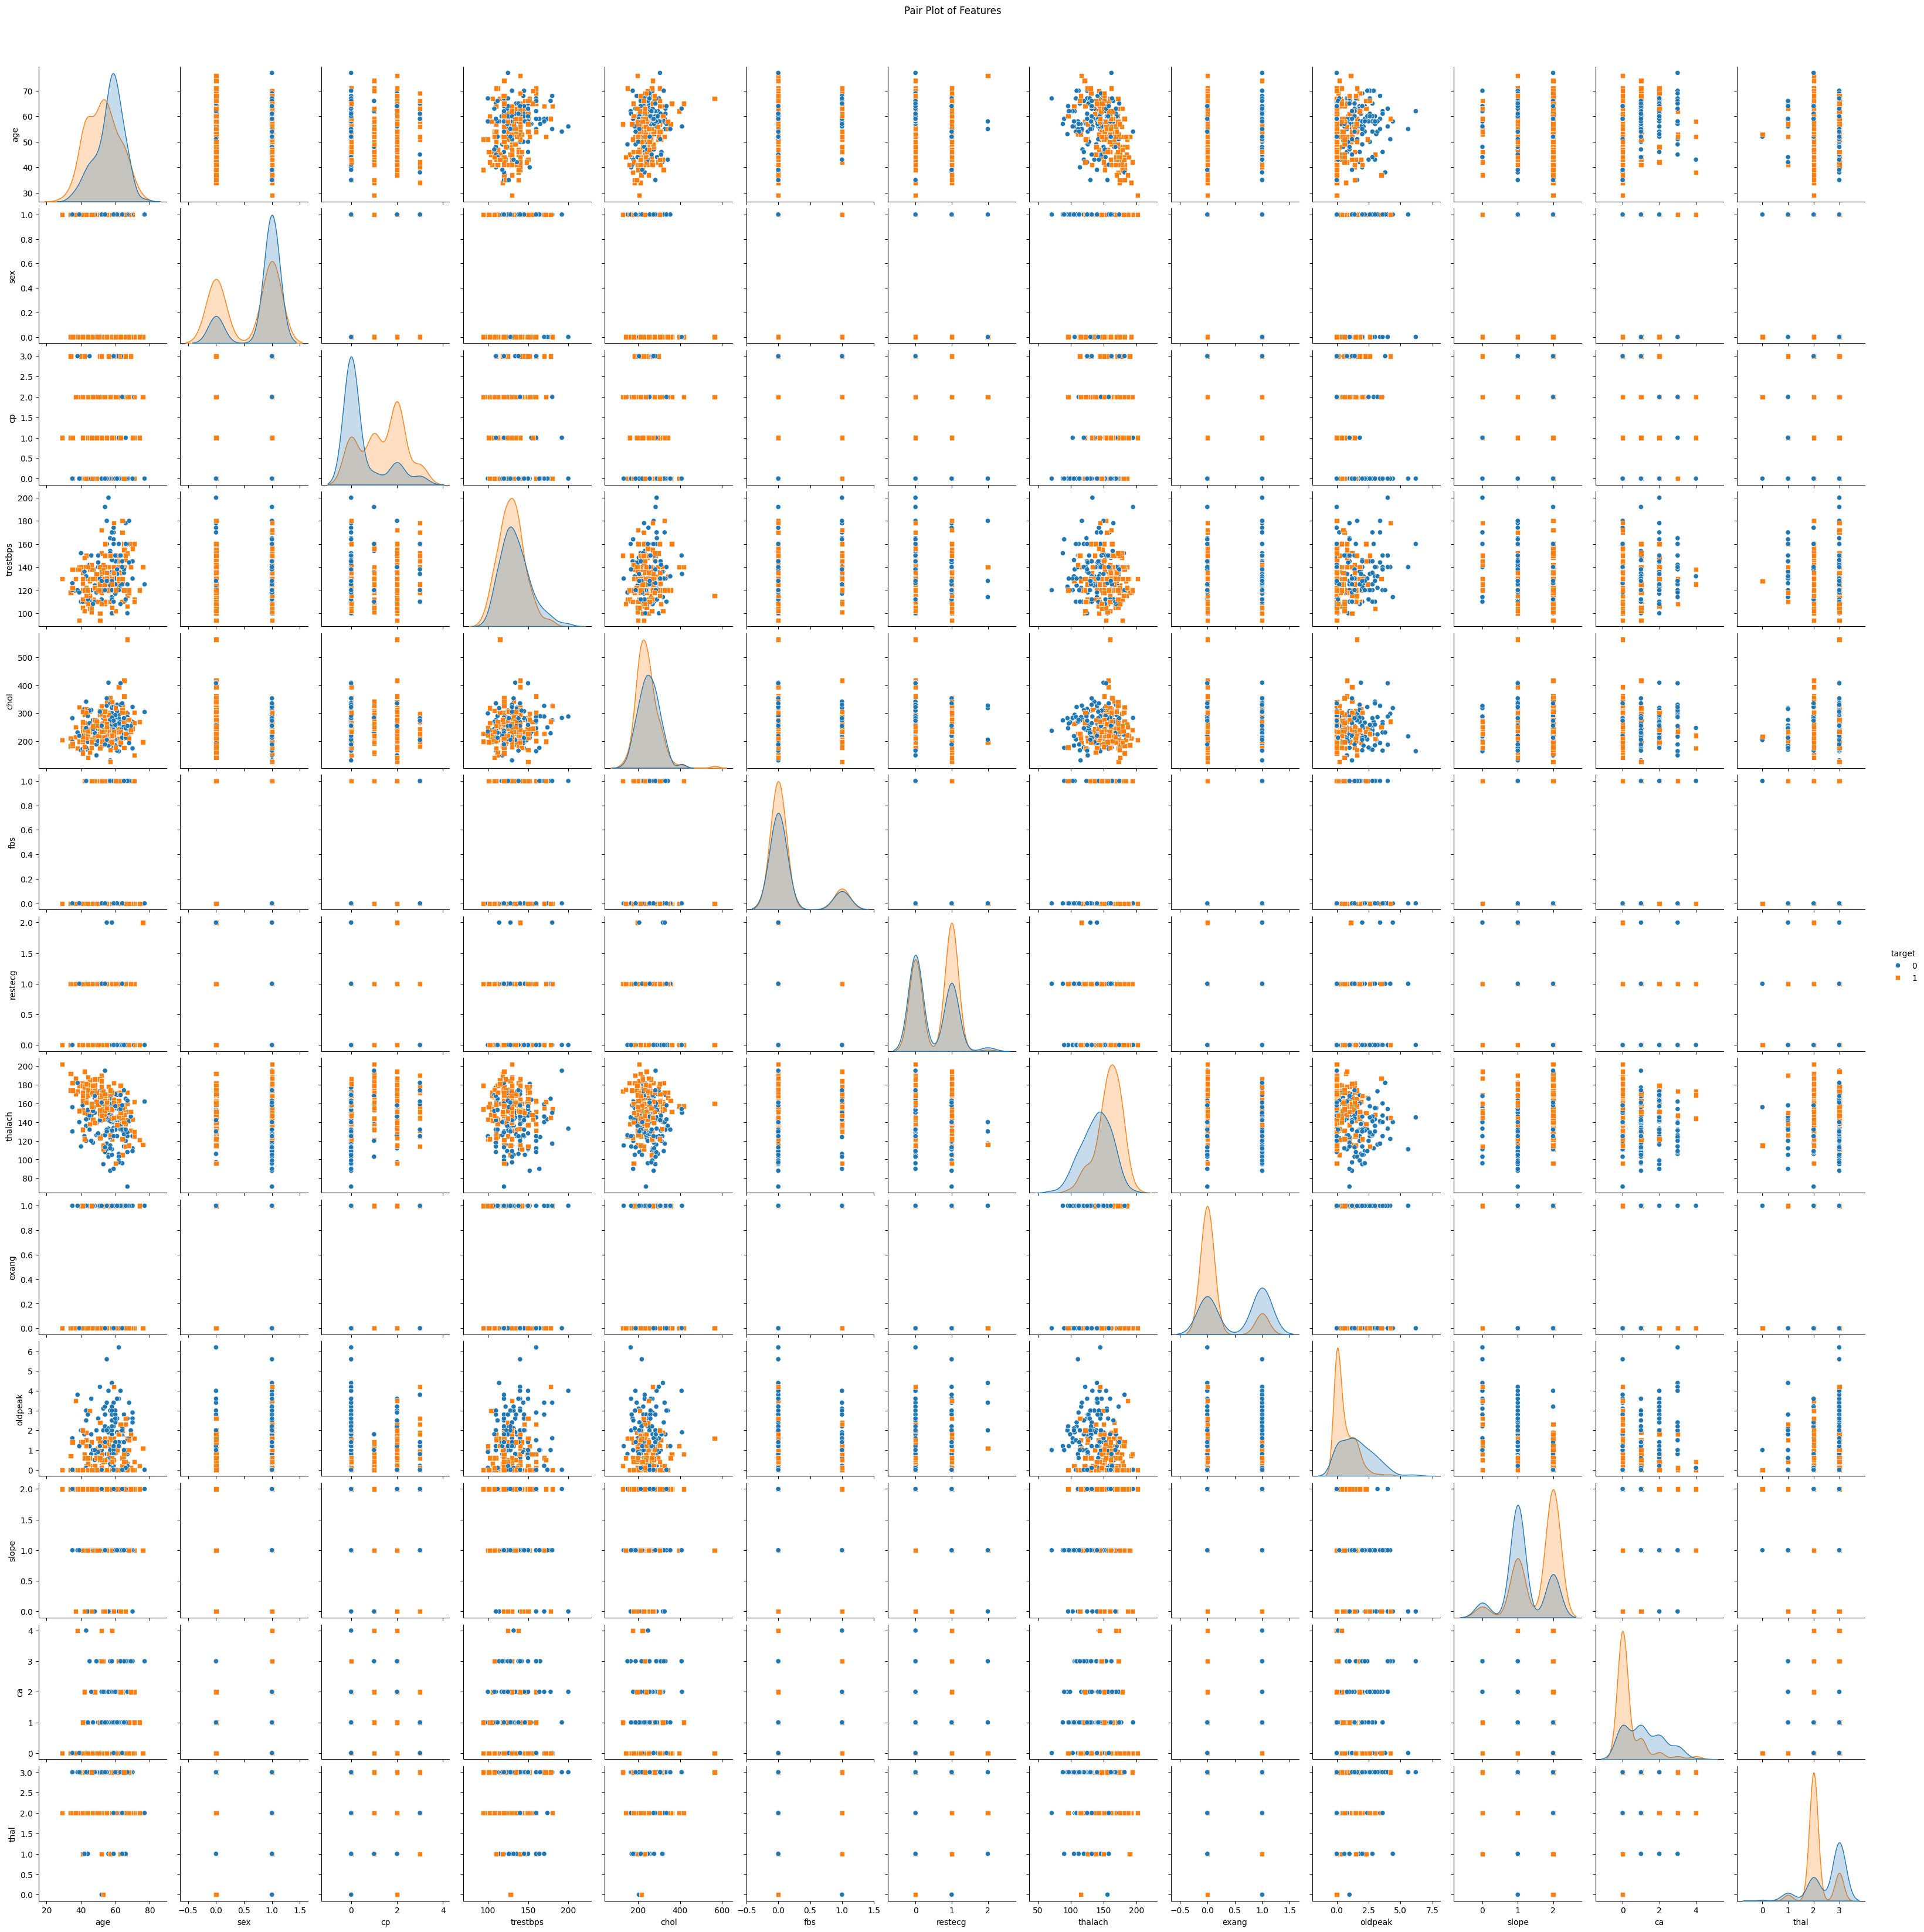

In [18]:
# Pair Plot to visualise relationship between variables
# visualize pairwise relationships in the dataset, highlighting the 'target' variable.
sns.pairplot(df, hue='target', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


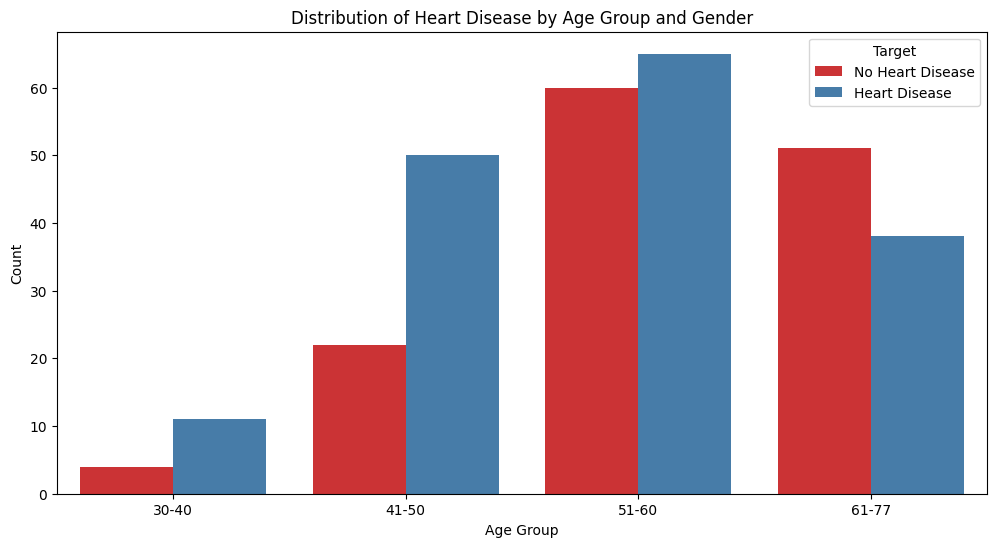

In [19]:
# Age Groups vs. Target by Gender :

# Create age groups
bins = [29, 40, 50, 60, 77]
labels = ['30-40', '41-50', '51-60', '61-77']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_group', hue='target', palette='Set1', dodge=True)
plt.title('Distribution of Heart Disease by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()



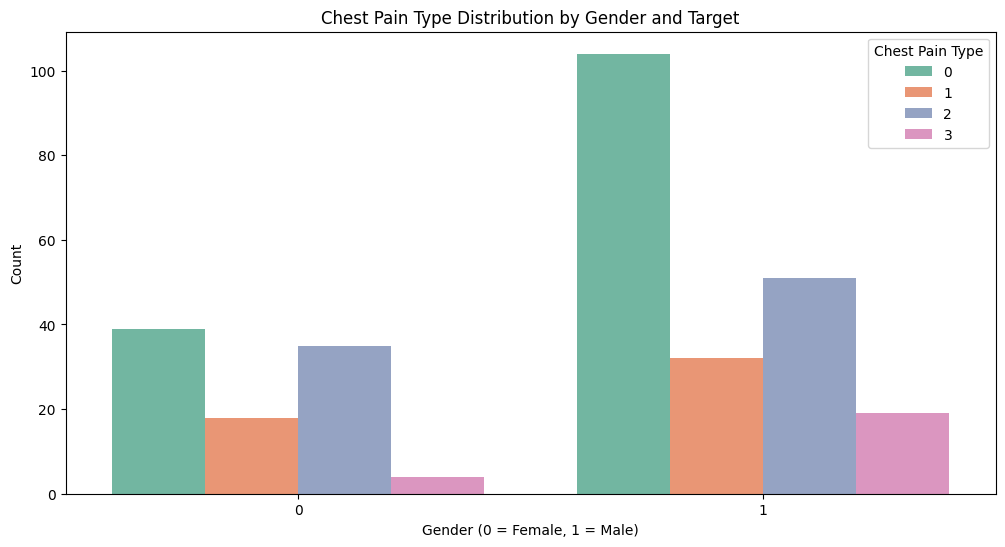

In [20]:
# Chest Pain Type (cp) by Gender and Target

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sex', hue='cp', palette='Set2', dodge=True)
plt.title('Chest Pain Type Distribution by Gender and Target')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right')
plt.show()




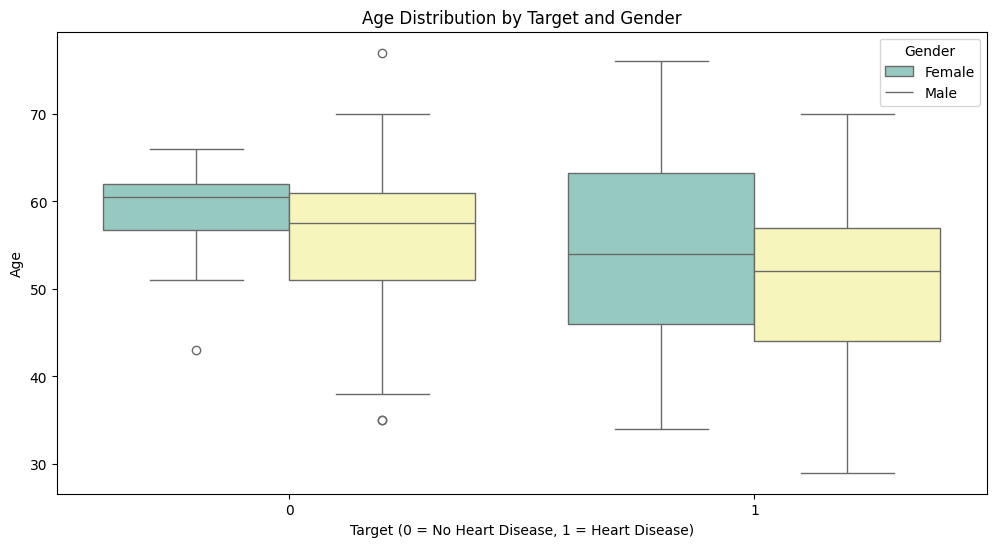

In [21]:
# Box Plot: Age vs. Target by Gender

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='target', y='age', hue='sex', palette='Set3')
plt.title('Age Distribution by Target and Gender')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Age')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show()



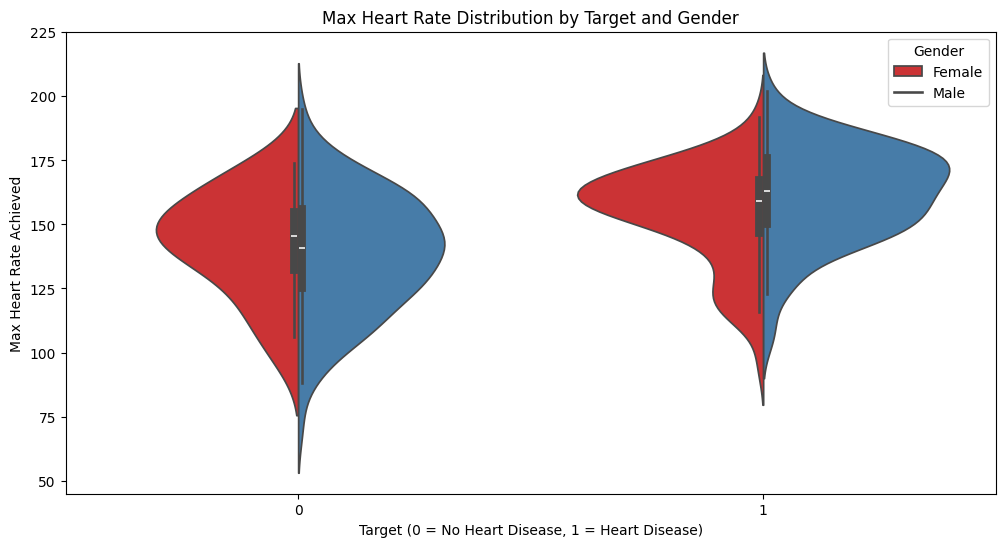

In [22]:
# Violin Plot: Max Heart Rate (thalach) vs. Target by Gender

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='target', y='thalach', hue='sex', split=True, palette='Set1')
plt.title('Max Heart Rate Distribution by Target and Gender')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Max Heart Rate Achieved')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show()



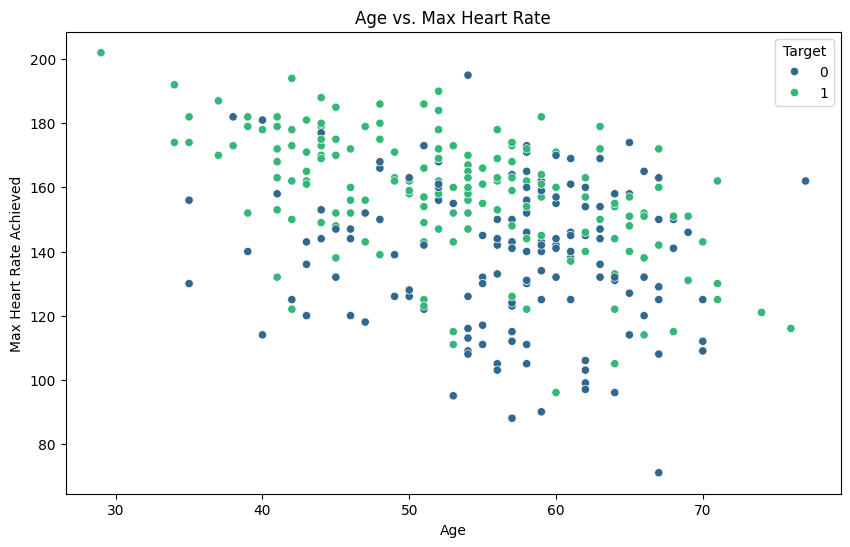

In [23]:
# Age vs. Max Heart Rate

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='viridis')
plt.title('Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.legend(title='Target')
plt.show()


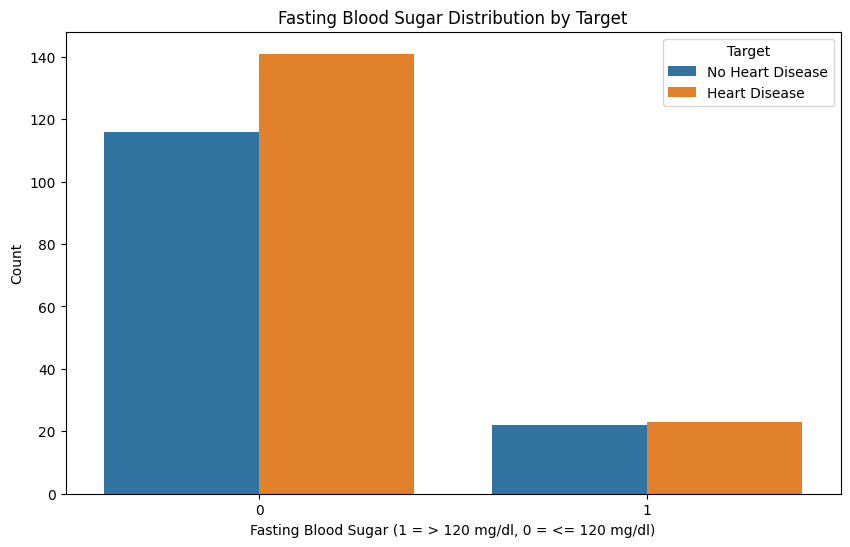

In [24]:
# Bar Plot: Fasting Blood Sugar vs. Target

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fbs', hue='target')
plt.title('Fasting Blood Sugar Distribution by Target')
plt.xlabel('Fasting Blood Sugar (1 = > 120 mg/dl, 0 = <= 120 mg/dl)')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()


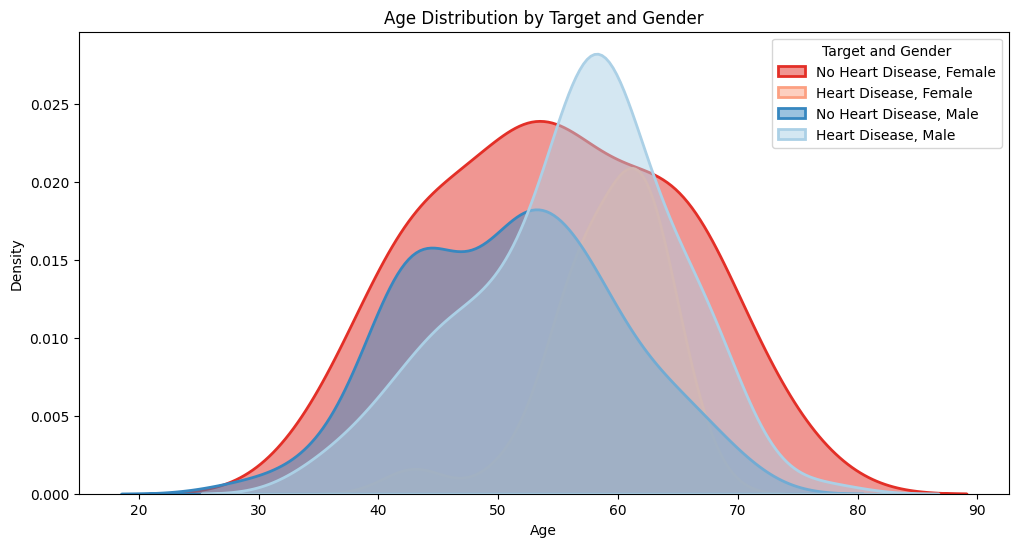

In [25]:
# KDE Plot: Age Distribution for Target by Gender

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['sex'] == 0], x='age', hue='target', fill=True, palette='Reds', alpha=0.5, linewidth=2, label='Female')
sns.kdeplot(data=df[df['sex'] == 1], x='age', hue='target', fill=True, palette='Blues', alpha=0.5, linewidth=2, label='Male')
plt.title('Age Distribution by Target and Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Target and Gender', loc='upper right', labels=['No Heart Disease, Female', 'Heart Disease, Female', 'No Heart Disease, Male', 'Heart Disease, Male'])
plt.show()



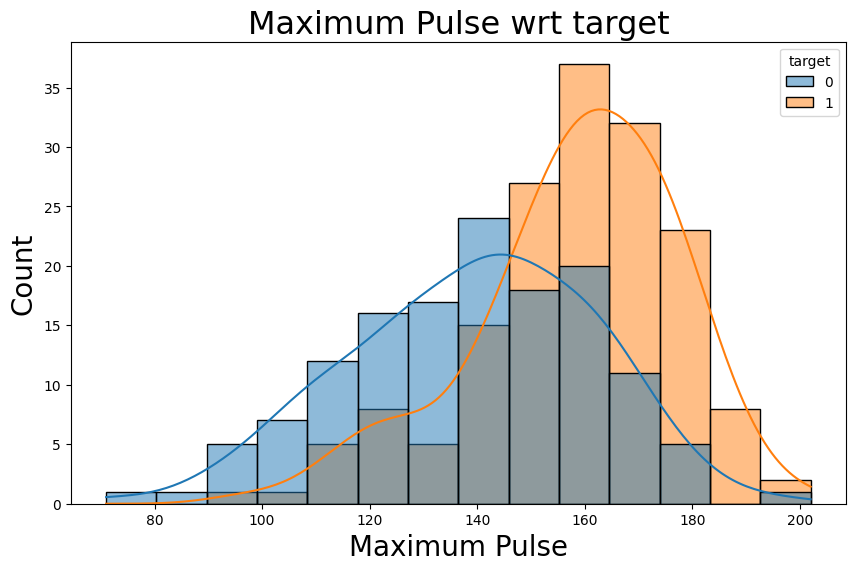

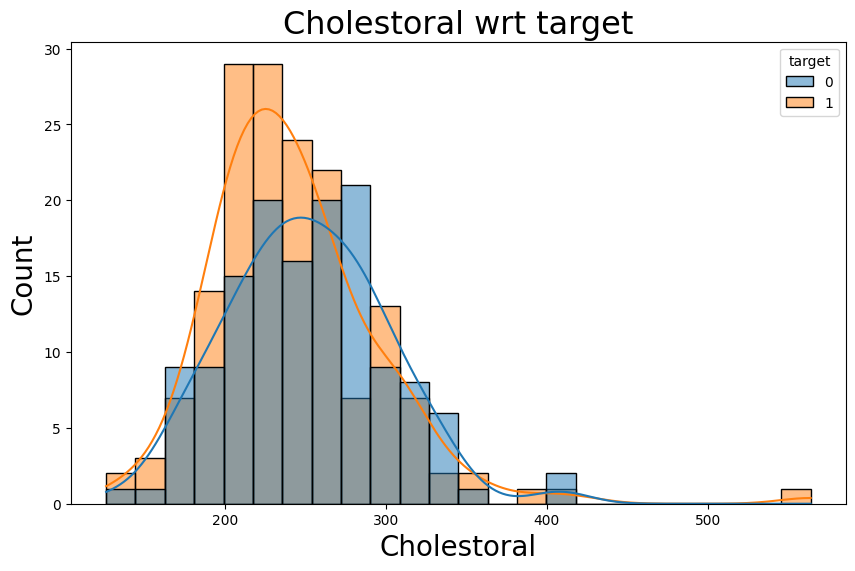

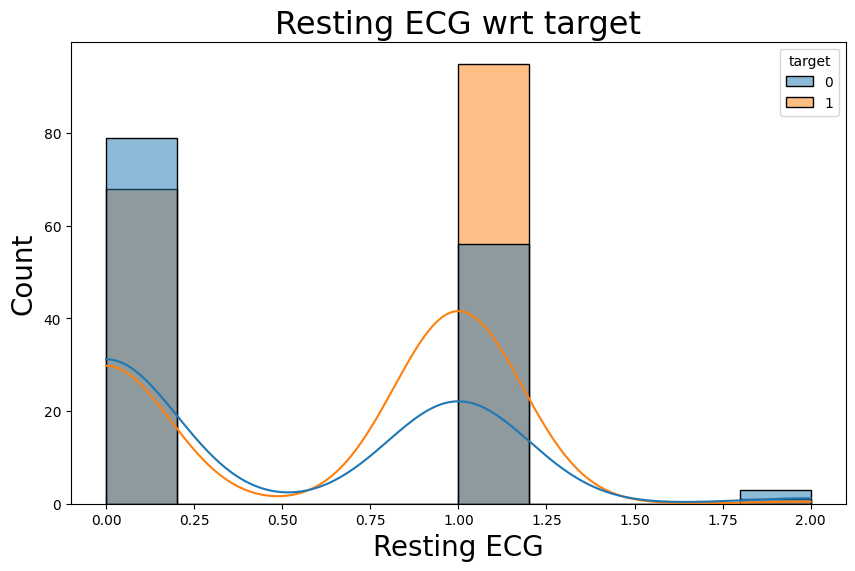

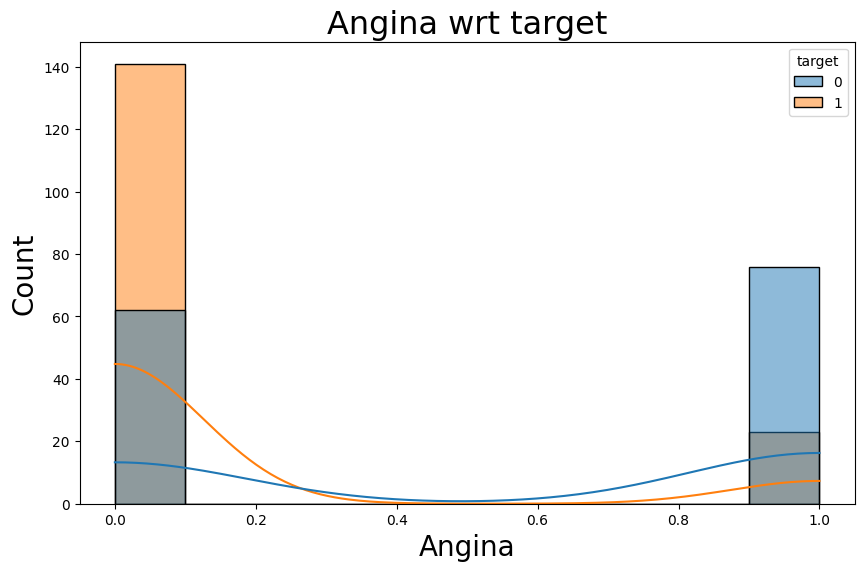

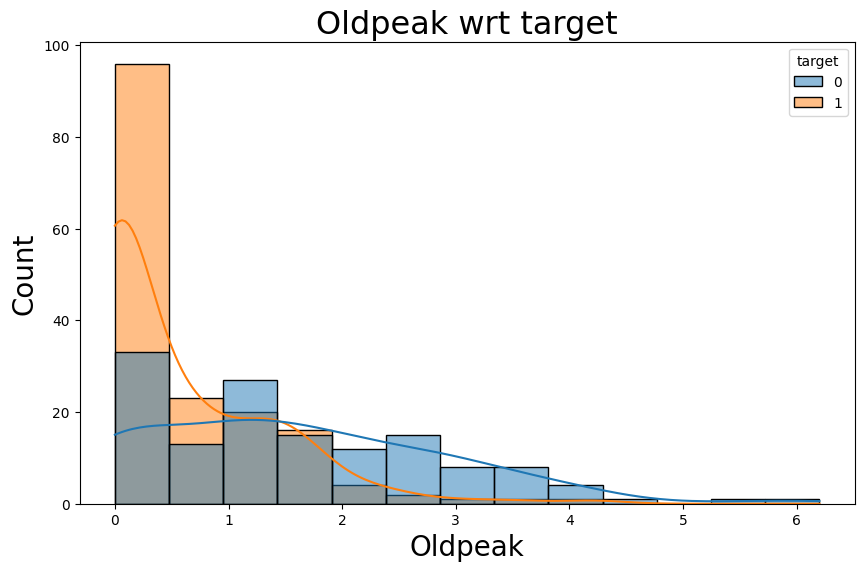

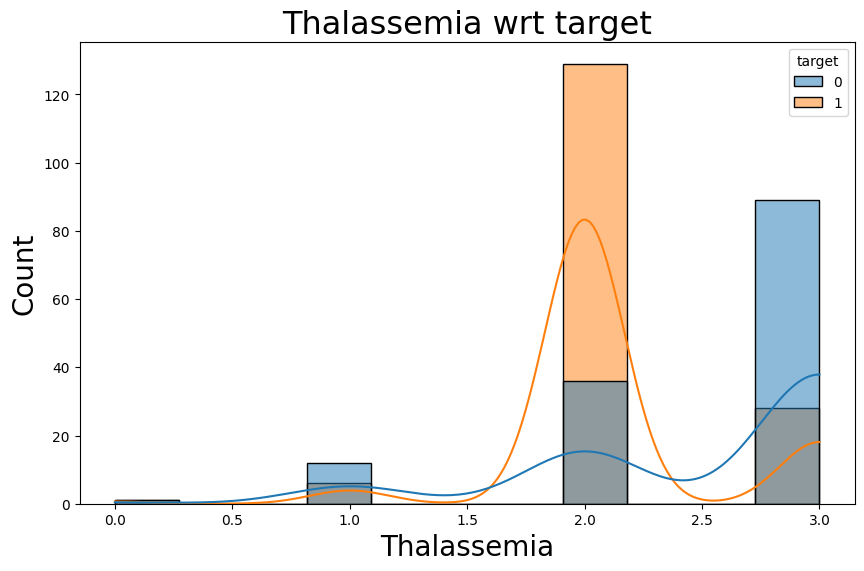

In [26]:
# Analysing attributes with respect to the Target value

plt.figure(figsize=(10, 6))
p = sns.histplot(data = df, x = 'thalach', kde = True, hue = 'target')
plt.xlabel("Maximum Pulse", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Maximum Pulse wrt target", fontsize=23)
plt.show(p)

plt.figure(figsize=(10, 6))
q = sns.histplot(data = df, x = 'chol', kde = True, hue = 'target')
plt.xlabel("Cholestoral", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Cholestoral wrt target", fontsize=23)
plt.show(q)

plt.figure(figsize=(10, 6))
r = sns.histplot(data = df, x = 'restecg', kde = True, hue = 'target')
plt.xlabel("Resting ECG", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Resting ECG wrt target", fontsize=23)
plt.show(r)

plt.figure(figsize=(10, 6))
s = sns.histplot(data = df, x = 'exang', kde = True, hue = 'target')
plt.xlabel("Angina", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Angina wrt target", fontsize=23)
plt.show(s)

plt.figure(figsize=(10, 6))
t = sns.histplot(data = df, x = 'oldpeak', kde = True, hue = 'target')
plt.xlabel("Oldpeak", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Oldpeak wrt target", fontsize=23)
plt.show(t)

plt.figure(figsize=(10, 6))
u = sns.histplot(data = df, x = 'thal', kde = True, hue = 'target')
plt.xlabel("Thalassemia", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Thalassemia wrt target", fontsize=23)
plt.show(u)

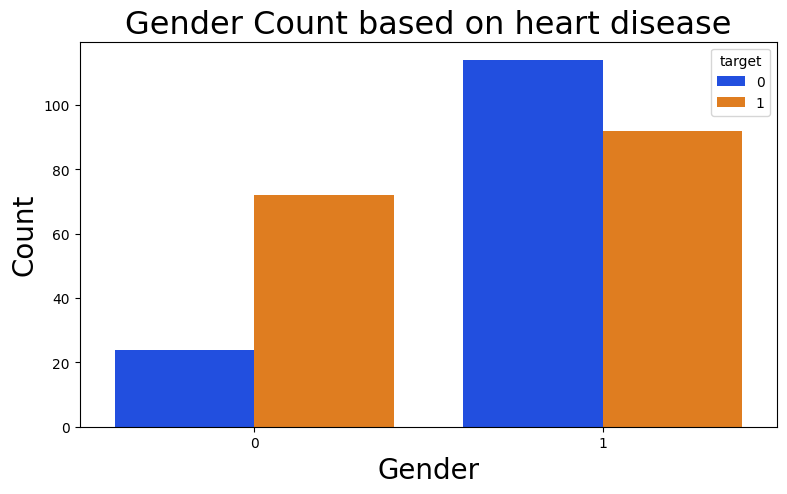

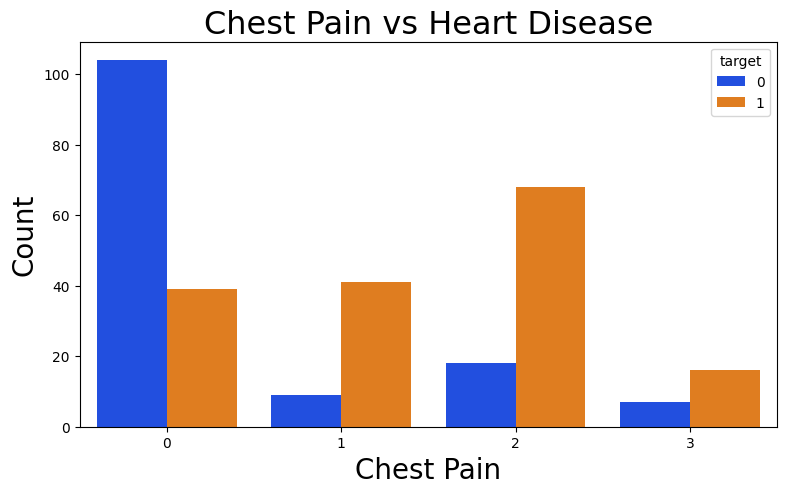

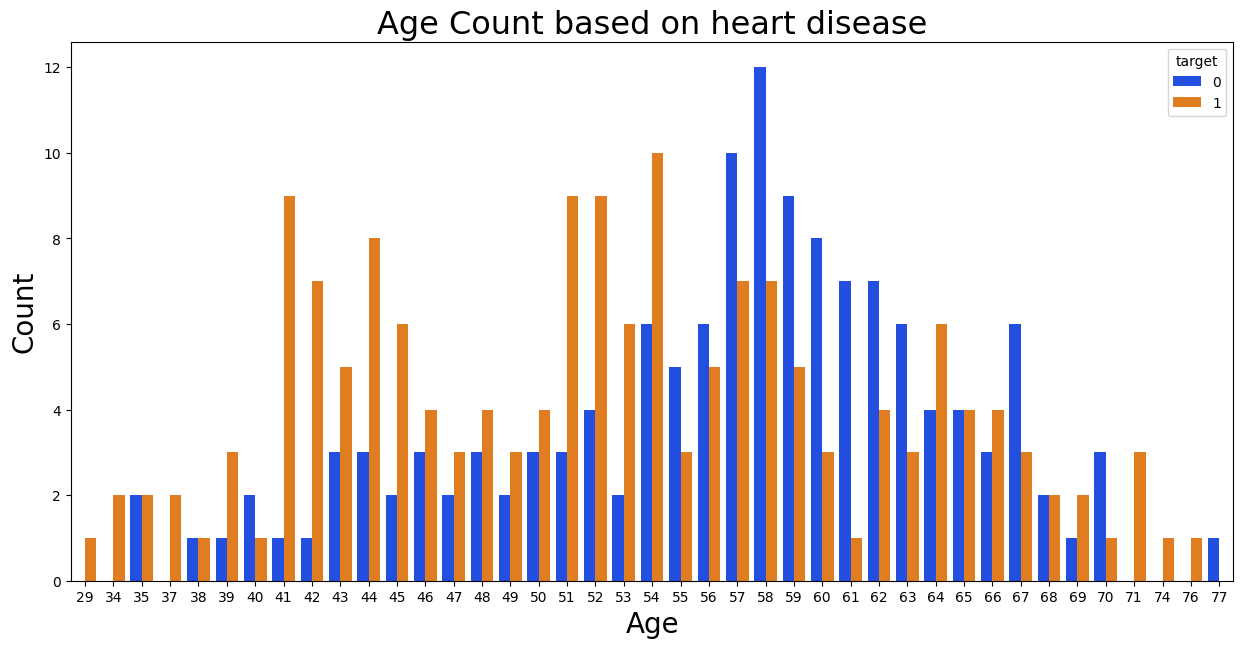

In [27]:
plt.figure(figsize=(9, 5))
p = sns.countplot(x="sex", data = df, hue='target', palette='bright')
plt.xlabel('Gender', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title("Gender Count based on heart disease", fontsize = 23)
plt.show(p)

plt.figure(figsize=(9, 5))
q = sns.countplot(x="cp", data = df, hue='target', palette='bright')
plt.xlabel('Chest Pain', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title("Chest Pain vs Heart Disease", fontsize = 23)
plt.show(q)

plt.figure(figsize=(15,7))
r = sns.countplot(x="age", data = df, hue='target', palette='bright')
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title("Age Count based on heart disease", fontsize = 23)
plt.show(r)

<ipython-input-28-73578bdfd834>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  p = sns.lineplot(data = df, x = 'age', y = 'cp', err_style="bars", hue = 'sex',


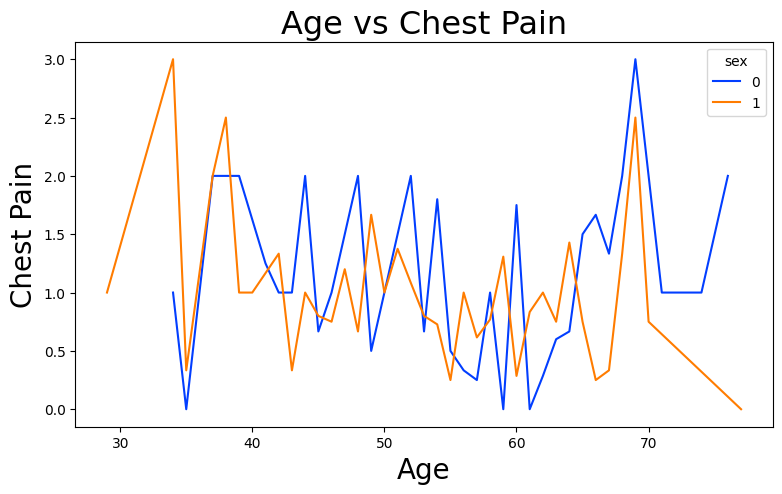

<ipython-input-28-73578bdfd834>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  q = sns.lineplot(data = df, x = 'age', y = 'trestbps', err_style="bars", hue = 'sex',


ValueError: 'yerr' must not contain negative values

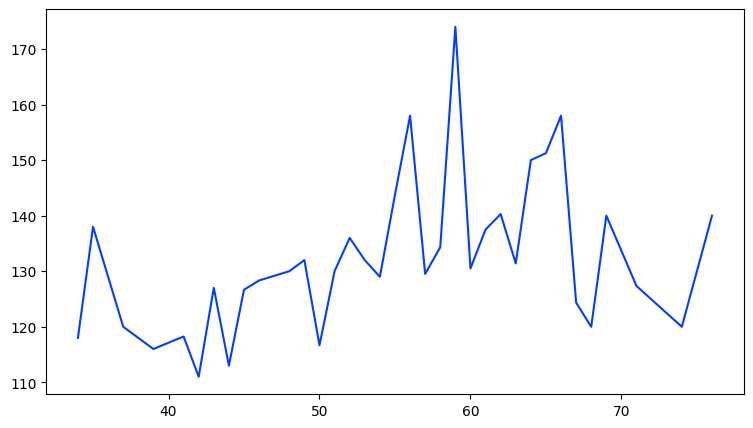

In [28]:
# Relating any two attributes wrt target

plt.figure(figsize=(9,5))
p = sns.lineplot(data = df, x = 'age', y = 'cp', err_style="bars", hue = 'sex',
                 palette='bright', ci = 0, legend='full')
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Chest Pain', fontsize = 20)
plt.title("Age vs Chest Pain", fontsize = 23)
plt.show(p)

plt.figure(figsize=(9,5))
q = sns.lineplot(data = df, x = 'age', y = 'trestbps', err_style="bars", hue = 'sex',
                 palette='bright', ci = 0, legend='full')
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Resting BP', fontsize = 20)
plt.title("Age vs Resting BP", fontsize = 23)
plt.show(q)

plt.figure(figsize=(9,5))
r = sns.lineplot(data = df, x = 'age', y = 'chol', err_style="bars", hue = 'sex',
                 palette='bright', ci = 0, legend='full')
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholestoral', fontsize = 20)
plt.title("Age vs Cholestoral", fontsize = 23)
plt.show(r)


<ipython-input-30-e8e46ebf0f4d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 65)` for the same effect.

  p = sns.lineplot(data = df, y = 'thalach', x = 'slope',hue = 'target',


Text(0.5, 1.0, 'ST Slope vs Max Pulse')

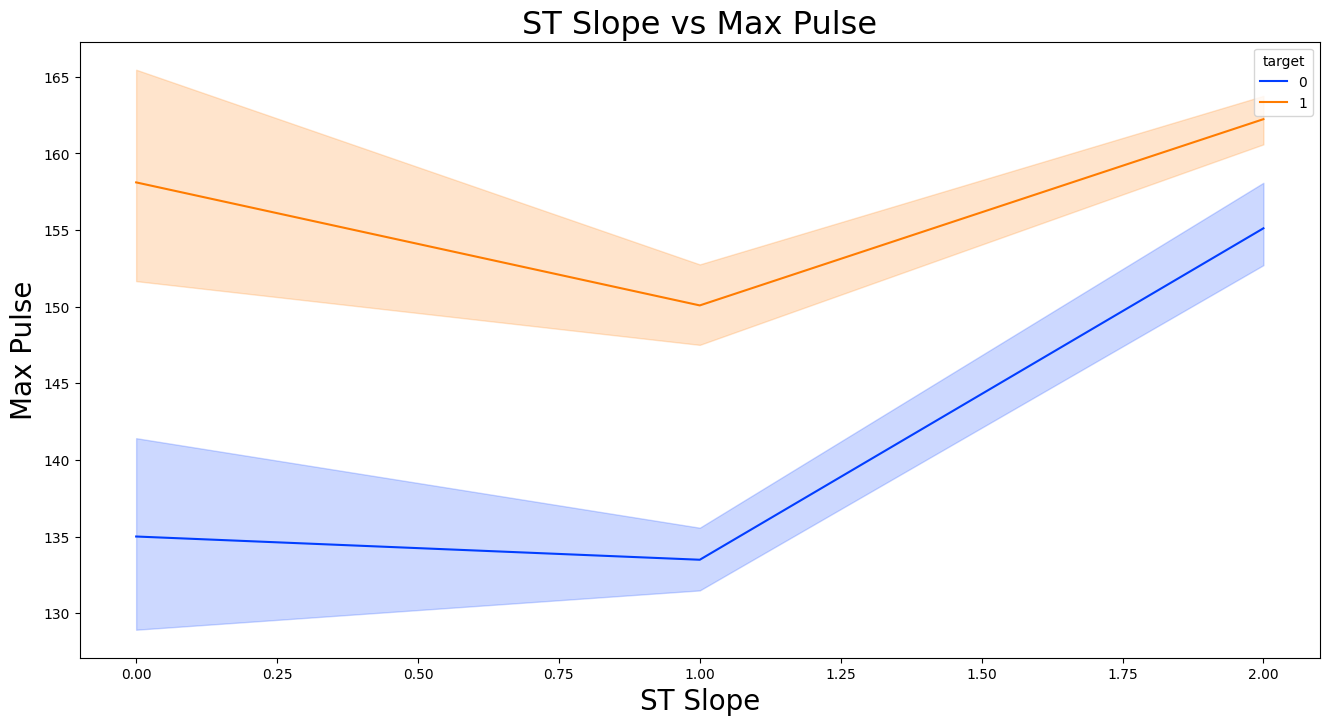

In [30]:
plt.figure(figsize=(16,8))
p = sns.lineplot(data = df, y = 'thalach', x = 'slope',hue = 'target',
                 palette='bright', ci = 65)
plt.xlabel('ST Slope', fontsize = 20)
plt.ylabel('Max Pulse', fontsize = 20)
plt.title("ST Slope vs Max Pulse", fontsize = 23)

Text(0.5, 1.0, 'Max Pulse vs Resting BP')

<Figure size 1400x600 with 0 Axes>

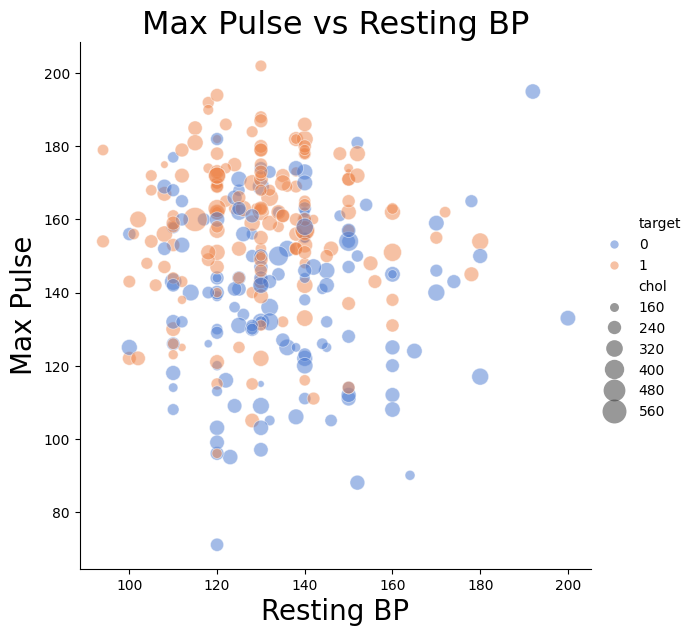

In [31]:
# scatter plot
# 'resting_bp', 'cholestoral', 'max_pulse'
plt.figure(figsize=(14, 6))
sns.relplot(data=df, x='trestbps', y='thalach', hue='target', size='chol',
            sizes=(20, 300), alpha=.5, palette="muted",
            height=6)
plt.xlabel("Resting BP", fontsize = 20)
plt.ylabel("Max Pulse", fontsize = 20)
plt.title("Max Pulse vs Resting BP", fontsize = 23)

Text(0.5, 1.0, 'Thalessemia vs Resting BP')

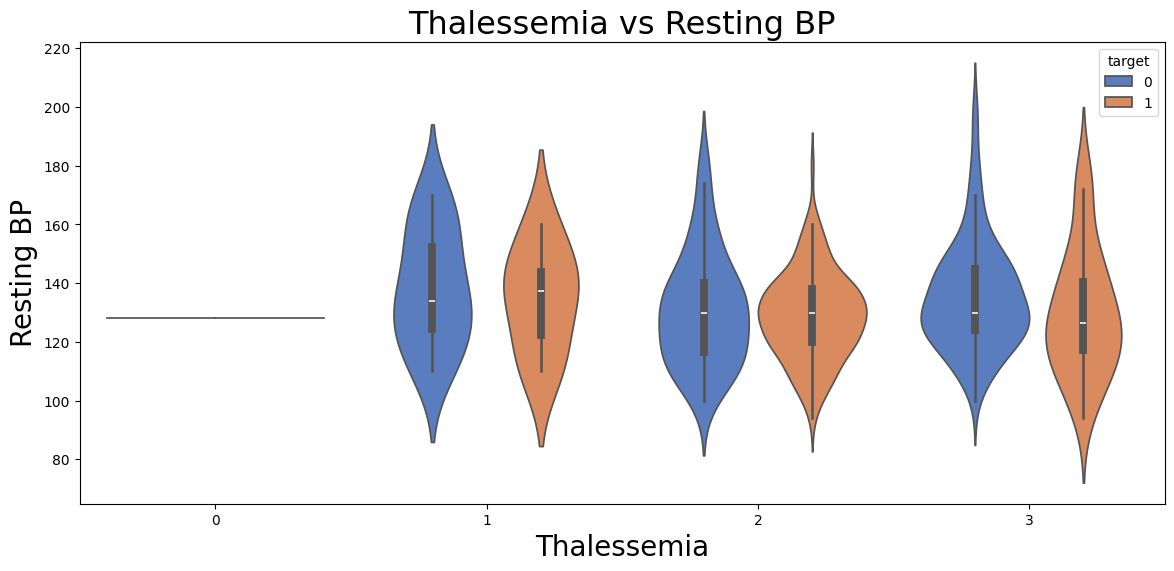

In [33]:
# violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='thal', y='trestbps', hue='target', palette="muted")
plt.xlabel("Thalessemia", fontsize = 20)
plt.ylabel("Resting BP", fontsize = 20)
plt.title("Thalessemia vs Resting BP", fontsize = 23)

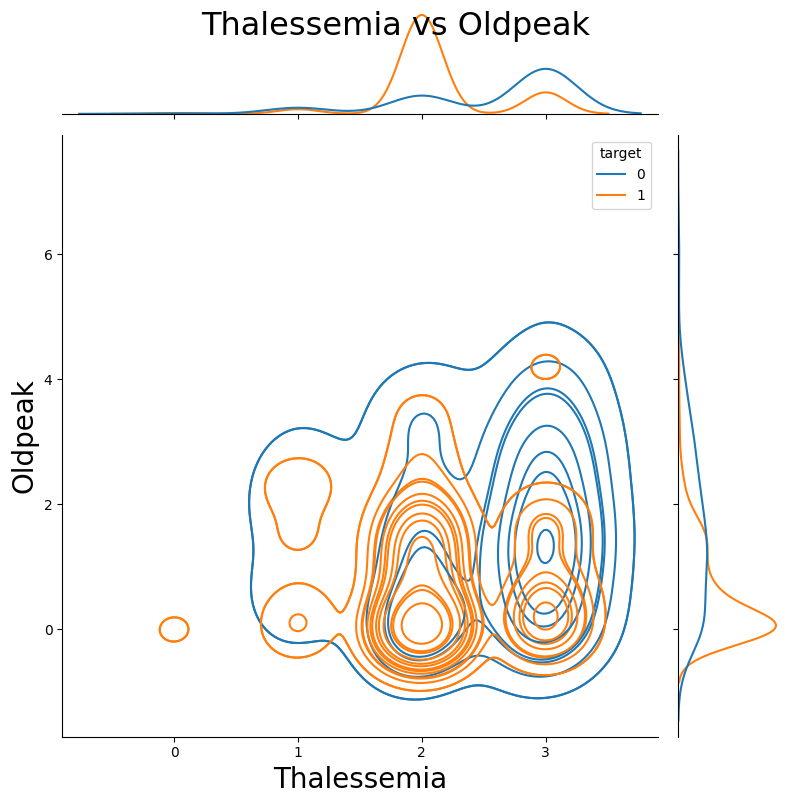

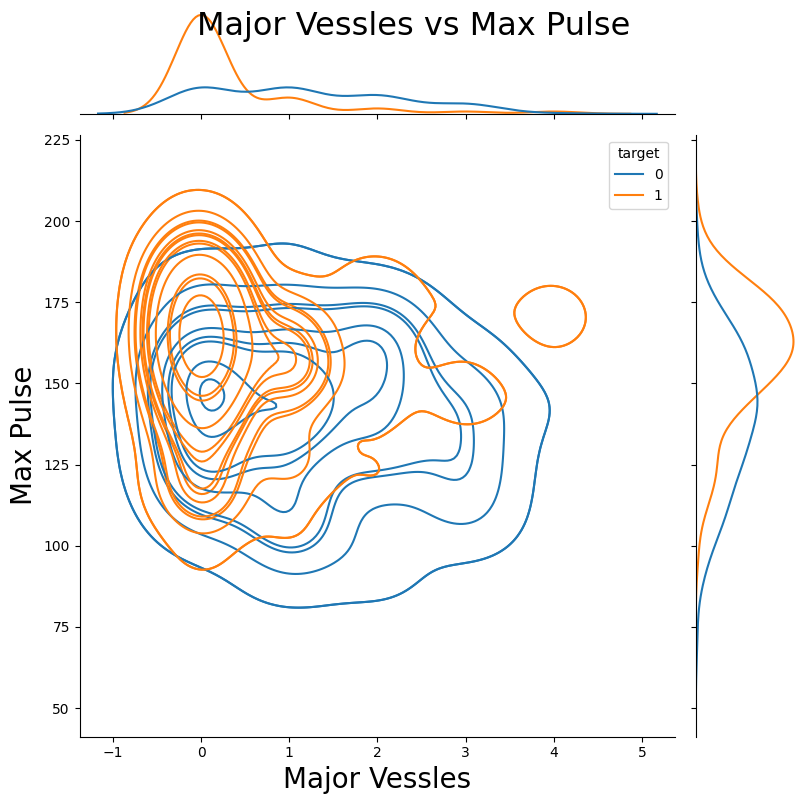

In [34]:
# Joint KDE plots

g = sns.jointplot(data=df, x="thal", y="oldpeak", hue="target",  kind="kde", height=8 )
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.set_axis_labels('Thalessemia', 'Oldpeak', fontsize=20)
g.fig.suptitle('Thalessemia vs Oldpeak', fontsize = 23)
# plt.title('Thalessemia vs Oldpeak')
plt.show(g)

h = sns.jointplot(data=df, x="ca", y="thalach", hue="target",  kind="kde", height=8 )
h.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
h.set_axis_labels('Major Vessles', 'Max Pulse', fontsize=20)
h.fig.suptitle('Major Vessles vs Max Pulse', fontsize = 23)
# plt.title('Thalessemia vs Oldpeak')
plt.show(h)